<h1>Why Does New Bedford, MA have so much mental illness?: A Regression Analysis</h1>

According to the Center for Disease Control's investigation of the 500 largest US cities, New Beford, MA has the highest self-reported mental illness rates in the nation. But why? For this project, I built a linear regression model to first, explain the mental health disparities across US cities more generally. This, so I could use the high leverage features from those models to recommend to New Bedford, specific interventions.

# Step One: Webscraping

I began by scraping CDC's website for relevant health data on the 500 largest US cities. Of course, I could have just downloaded the data in csv format, but, frankly, I wanted the html practice. 

In [8]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
import numpy as np


In [2]:
#Get list of city IDs

response = requests.get("https://www.cdc.gov/500cities/")
page = response.text
soup = BeautifulSoup(page, "lxml")

L = soup.find_all(id="Locations")

ids = []
for i in range(1, len(L[0].contents), 2):
    if L[0].contents[i].get('value').isnumeric():
        ids.append(L[0].contents[i].get('value'))
ids.append("4876000") #add comment here     

In [3]:
#Split up the city IDs into multiple sets
id_set1a = ids[0:10]
id_set1b = ids[10:100]
id_set2 = ids[100:200]
id_set3 = ids[200:300]
id_set4 = ids[300:400]
id_set5 = ids[400:500]

In [4]:
#Initialize DataFrame
cols = ["name", "pop", "arth1", "arth2", "asthma1", 
        "asthma2", "hbp1", "hbp2", "canc1", "canc2", 
        "hc1", "hc2", "ckd1", "ckd2", "copd1", "copd2", "chd1",
        "chd2", "dd1", "dd2", "mhng1", "mhng2", "phng1", "phng2",
        "atl1", "atl2", "stroke1", "stroke2", "lackh1", "lackh2",
        "docv1", "docv2", "dentv1", "dentv2", "hbpm1", "hbpm2", "chsc1",
        "chsc2", "mamm1", "mamm2", "papan1", "papan2", "feca1", "feca2",
        "cpsm1", "cpsm2", "cpsw1", "cpsw2", "bd1", "bd2", "cs1", "cs2",
        "npa1", "npa2", "obes1", "obes2", "sleep1", "sleep2"]
df = []
df = pd.DataFrame(columns=cols)
url = "https://nccd.cdc.gov/500_Cities/rdPage.aspx?rdReport=DPH_500_Cities.ComparisonReport&Locations={}"

In [ ]:
count=0
for citynum in id_set5:
    response = requests.get(url.format(citynum))
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    df = df.append(scrape_page(soup), ignore_index=True)
    print(count, " ", citynum)
    count+=1
    time.sleep(2)

In [6]:
def scrape_page(soup):

    mydict={}

    #TABLE 1

    list = soup.find_all("span", style = "font-weight:normal;")[1].text.split(':')
    mydict["name"] = list[0]
    mydict["pop"] = list[1]

    mydict["arth1"] = (soup.find_all("tr", row="1")[0].find_all("span")[10].text)
    mydict["asthma1"] =(soup.find_all("tr", row="3")[0].find_all("span")[10].text)
    mydict["hbp1"] =(soup.find_all("tr", row="5")[0].find_all("span")[10].text)
    mydict["canc1"]=(soup.find_all("tr", row="7")[0].find_all("span")[10].text)
    mydict["hc1"]=(soup.find_all("tr", row="9")[0].find_all("span")[10].text)
    mydict["ckd1"]=(soup.find_all("tr", row="11")[0].find_all("span")[10].text)
    mydict["copd1"]=(soup.find_all("tr", row="13")[0].find_all("span")[10].text)
    mydict["chd1"]=(soup.find_all("tr", row="15")[0].find_all("span")[10].text)
    mydict["dd1"]=(soup.find_all("tr", row="17")[0].find_all("span")[10].text)
    mydict["mhng1"]=(soup.find_all("tr", row="19")[0].find_all("span")[10].text)
    mydict["phng1"]=(soup.find_all("tr", row="21")[0].find_all("span")[10].text)
    mydict["atl1"]=(soup.find_all("tr", row="23")[0].find_all("span")[10].text)
    mydict["stroke1"]=(soup.find_all("tr", row="25")[0].find_all("span")[10].text)
    mydict["arth2"] = (soup.find_all("tr", row="2")[0].find_all("span")[2].text)
    mydict["asthma2"] =(soup.find_all("tr", row="4")[0].find_all("span")[2].text)
    mydict["hbp2"] =(soup.find_all("tr", row="6")[0].find_all("span")[2].text)
    mydict["canc2"]=(soup.find_all("tr", row="8")[0].find_all("span")[2].text)
    mydict["hc2"]=(soup.find_all("tr", row="10")[0].find_all("span")[2].text)
    mydict["ckd2"]=(soup.find_all("tr", row="12")[0].find_all("span")[2].text)
    mydict["copd2"]=(soup.find_all("tr", row="14")[0].find_all("span")[2].text)
    mydict["chd2"]=(soup.find_all("tr", row="16")[0].find_all("span")[2].text)
    mydict["dd2"]=(soup.find_all("tr", row="18")[0].find_all("span")[2].text)
    mydict["mhng2"]=(soup.find_all("tr", row="20")[0].find_all("span")[2].text)
    mydict["phng2"]=(soup.find_all("tr", row="22")[0].find_all("span")[2].text)
    mydict["atl2"]=(soup.find_all("tr", row="24")[0].find_all("span")[2].text)
    mydict["stroke2"]=(soup.find_all("tr", row="26")[0].find_all("span")[2].text)

    #TABLE 2

    mydict["lackh1"] = (soup.find_all("tr", row="1")[1].find_all("span")[10].text)
    mydict["docv1"] =(soup.find_all("tr", row="3")[1].find_all("span")[10].text)
    mydict["dentv1"] =(soup.find_all("tr", row="5")[1].find_all("span")[10].text)
    mydict["hbpm1"]=(soup.find_all("tr", row="7")[1].find_all("span")[10].text)
    mydict["chsc1"]=(soup.find_all("tr", row="9")[1].find_all("span")[10].text)
    mydict["mamm1"]=(soup.find_all("tr", row="11")[1].find_all("span")[10].text)
    mydict["papan1"]=(soup.find_all("tr", row="13")[1].find_all("span")[10].text)
    mydict["feca1"]=(soup.find_all("tr", row="15")[1].find_all("span")[10].text)
    mydict["cpsm1"]=(soup.find_all("tr", row="17")[1].find_all("span")[10].text)
    mydict["cpsw1"]=(soup.find_all("tr", row="19")[0].find_all("span")[10].text)
    mydict["lackh2"] = (soup.find_all("tr", row="2")[1].find_all("span")[2].text)
    mydict["docv2"] =(soup.find_all("tr", row="4")[1].find_all("span")[2].text)
    mydict["dentv2"] =(soup.find_all("tr", row="6")[1].find_all("span")[2].text)
    mydict["hbpm2"]=(soup.find_all("tr", row="8")[1].find_all("span")[2].text)
    mydict["chsc2"]=(soup.find_all("tr", row="10")[1].find_all("span")[2].text)
    mydict["mamm2"]=(soup.find_all("tr", row="12")[1].find_all("span")[2].text)
    mydict["papan2"]=(soup.find_all("tr", row="14")[1].find_all("span")[2].text)
    mydict["feca2"]=(soup.find_all("tr", row="16")[1].find_all("span")[2].text)
    mydict["cpsm2"]=(soup.find_all("tr", row="18")[1].find_all("span")[2].text)
    mydict["cpsw2"]=(soup.find_all("tr", row="20")[1].find_all("span")[2].text)

    #TABLE 3

    mydict["bd1"] = (soup.find_all("tr", row="1")[2].find_all("span")[10].text)
    mydict["cs1"] =(soup.find_all("tr", row="3")[2].find_all("span")[10].text)
    mydict["npa1"] =(soup.find_all("tr", row="5")[2].find_all("span")[10].text)
    mydict["obes1"]=(soup.find_all("tr", row="7")[2].find_all("span")[10].text)
    mydict["sleep1"]=(soup.find_all("tr", row="9")[2].find_all("span")[10].text)
    mydict["bd2"] = (soup.find_all("tr", row="2")[2].find_all("span")[2].text)
    mydict["cs2"] =(soup.find_all("tr", row="4")[2].find_all("span")[2].text)
    mydict["npa2"] =(soup.find_all("tr", row="6")[2].find_all("span")[2].text)
    mydict["obes2"]=(soup.find_all("tr", row="8")[2].find_all("span")[2].text)
    mydict["sleep2"]=(soup.find_all("tr", row="10")[2].find_all("span")[2].text)

    return mydict

<h1>Step Two: Data Cleaning</h1>

A bit of preprocessing to get the data in a shape suitable for analysis.

In [72]:
df.to_csv('cdc500.csv')

In [149]:
def extract_name(string):
    L = string.split("2")
    return L[0]

def str_to_int(string):
    string = string.replace(",","")
    return(int(string))

def extract_number(string):
    try:
        nums = string.split("(")
        return float(nums[0])
    except:
        return np.NaN

In [76]:
df["name"] = df["name"].apply(extract_name)
df["pop"] = df["pop"].apply(str_to_int)


In [80]:
df1 = df.iloc[:, 0:2]
df2 = df.iloc[:,2: ]
df2 = df2.replace("", np.NaN)
df2 = df2.applymap(extract_number)
cdc500 = pd.concat([df1,df2], axis=1)
cdc500 = cdc500.drop(columns="Unnamed: 0")
cdc500.to_csv('cdc500_cleaned.csv')

<h1>Step Three: Exploratory Data Analysis</h1>

I visualized the data to understand the distributions of my target and feature variables. Also, the correlations between target and features, as well as between features. Two takeaways: linear relationships between many features and target seemed to indicate a linear regression would be appropriate. Secondly, no surprise, many of my features were multicollinear which hinted at regularization.

In [7]:
#Defining variables:

#mhng: mental health not good
#atl2: dental health
#lackh2: lack of health insurance
#bd2: binge drinking
#cs2: chronic smoking
#npa2: lack of physical activity
#obes2: obesity
#sleep2: poor sleep
#cpsm2: men up-to-date on core preventative services
#cpsw2: women up-to-date on core preventative services
#chd2: chronic heart disease

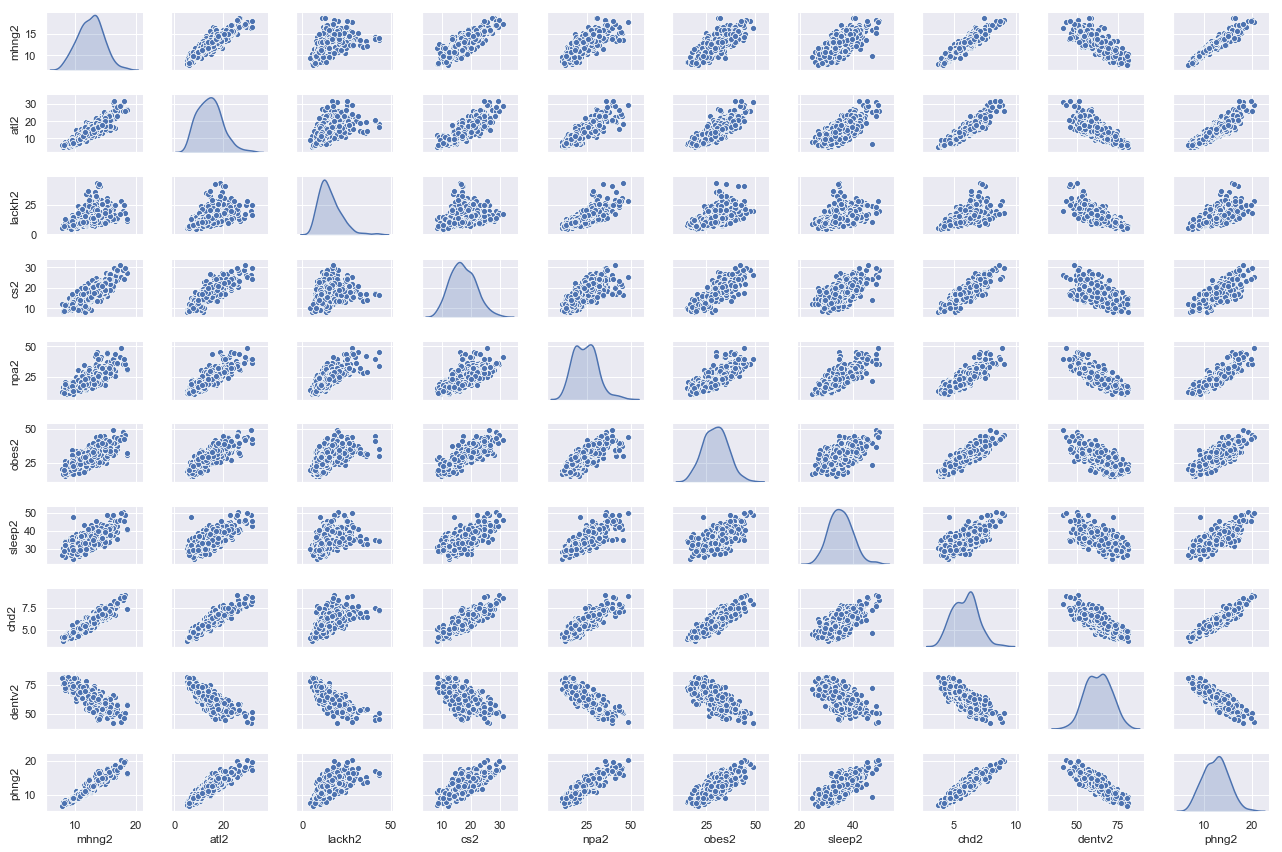

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

#subset an experimental dataframe that only includes features relevant to our current analysis
df = cdc500[["mhng2", "atl2", "lackh2", "cs2", "npa2", "obes2", "sleep2", "chd2", "dentv2", "phng2"]]

#create a pair plot to show correlations across features and target
sns.set()
sns.pairplot(df, height=1.2, aspect=1.5, diag_kind='kde');

<h1>Step Four: Modeling</h1>

Before modeling, I held out 20% of my data for final testing. And since I'd be relying on relevant coefficient sizes to infer feature importance, I used kfold cross validation, repeated 5 times, to gain more confidence in my results. 

In [34]:
#hold out 20% of the data for final testing

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=15) 
X, y = np.array(X), np.array(y)

lm_r2s = []
c1 =[]
c2 =[]
c3 =[]
c4 =[]
c5 =[]
c6 =[]
c7 =[]
c8 =[]
c9 =[]

coeff_dict = {}

df_coeff = pd.DataFrame()

In [35]:
#collect the validation results for both models
kf = KFold(n_splits=5, shuffle=True, random_state = 25)
for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #ridge with feature scaling
    lm = Ridge(alpha=1)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm.fit(X_train_scaled, y_train)
    lm_r2s.append(lm.score(X_val_scaled, y_val))
    c1.append(lm.coef_[0])
    c2.append(lm.coef_[1])
    c3.append(lm.coef_[2])
    c4.append(lm.coef_[3])
    c5.append(lm.coef_[4])
    c6.append(lm.coef_[5])
    c7.append(lm.coef_[6])
    c8.append(lm.coef_[7])
    c9.append(lm.coef_[8])

In [33]:
np.mean(lm_r2s)

0.9413865781358552

As you can see, above, the model R^2 score came out to 94%. There was also relative differences between my coefficients, but in order to be certain those differences are reliable, I plotted the boxplots of each coefficient's 25 scores that came through cross validation to see if there was significant overlap. The less overlap, the more I could be confident in the relative differences between features.

In [40]:
df_coeff["c1"] = c1
df_coeff["c2"] = c2
df_coeff["c3"] = c3
df_coeff["c4"] = c4
df_coeff["c5"] = c5
df_coeff["c6"] = c6
df_coeff["c7"] = c7
df_coeff["c8"] = c8
df_coeff["c9"] = c9

df_coeff.head()
df_coeff = df_coeff.rename(columns = {"c1": "Lost Teeth", 
           "c2": "Lack Health Insurance", 
           "c3": "Smoking",
           "c4": "Physical Inactivity",
           "c5": "Obesity",
           "c6": "Poor Sleep", 
           "c7": "Heart Disease",
           "c8": "Dentist Visits",
           "c9": "Poor Phys Health"})
df_coeff = df_coeff.applymap(abs)

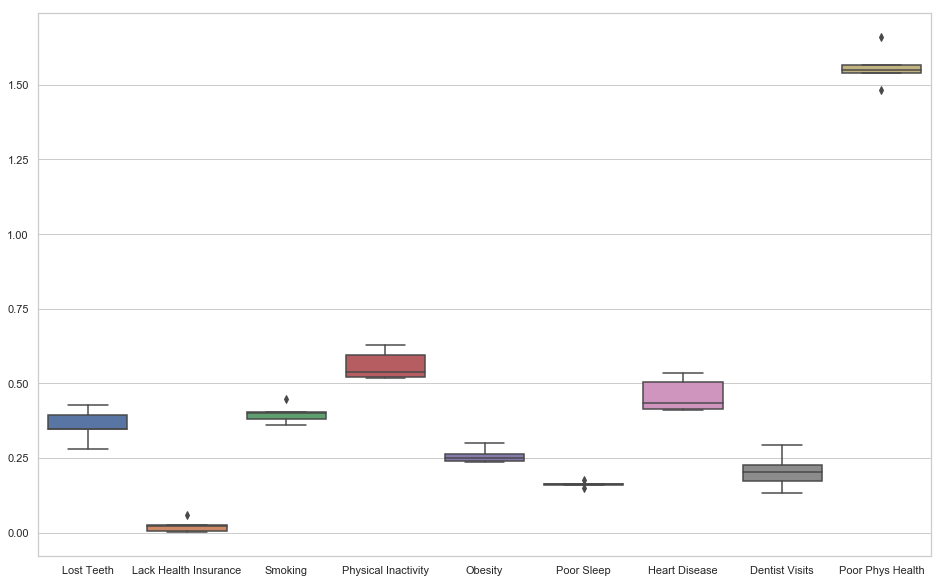

In [10]:
sns.set(rc={'figure.figsize':(16,10)})
sns.set_style("whitegrid") 
sns.boxplot(data = df_coeff)

As you can see from the boxplot above, there is sufficient distance between many of the feature coefficient distributions. But because the point of this analysis is to make recommendations to improve mental health rates, I wanted to exclude features that I deemed to be "acausal" from my analysis and then re-run the plot.

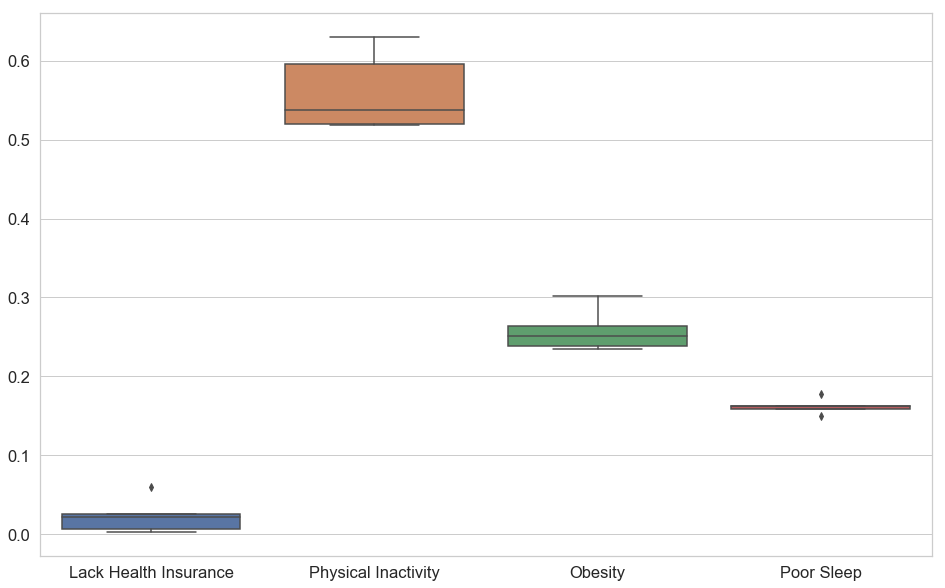

In [12]:
df_coeff_causal = df_coeff.drop(columns = ["Lost Teeth", "Smoking", "Heart Disease", "Dentist Visits", "Poor Phys Health"])

sns.set(rc={'figure.figsize':(16,10)})   
sns.set(font_scale=1.5)

sns.set_style("whitegrid") 
sns.boxplot(data = df_coeff_causal)

In [16]:
#Score once more on test data to get a final R^2 score of 95%

X_test_scaled = scaler.fit_transform(X_test)
lm.fit(X_train_scaled, y_train)
lm.score(X_test_scaled, y_test)

0.9470327235958457

# Conclusion

As you can see from the final boxplot, physical inactivity emerged as the feature with the greatest coefficient aka the "highest leverage causal feature". Of course, we can't be sure that physical activity causes mental health (causality could run in the opposite direction, to say nothing of potential confounding), so what I recommend for New Bedford, MA, is to run a randomized controlled experiment to try to boost physical activity to see if it makes a difference in mental illness rates. 